# Lab: Classification with Decision Trees

**Objectives of the practical work:**

1. Learn how to build decision trees with scikit-learn  
2. Be familiar with some parameters and visualization tools
3. Use a real-case dataset (COMPASS ) as an example
4. Evaluate diverse trees in terms of training and testing accuracies with different parameters
5. Study the impact of some parameters on the sensitivity aspect




## PART 1: Basic steps 

The following are basic instructions to start with decision trees. You need to execute them one by one to understand the basic steps for learning decision trees. Once you get familiar with the different steps, you will be working on the compass dataset. 

The decision tree package that we use is from scikit-learn. The full documentation of decision trees are available at https://scikit-learn.org/stable/modules/tree.html

Take a moment to briefly consult the documentation.

We need first to include some libraries: 




In [2]:
from sklearn import tree
from matplotlib import pyplot as plt # for a good visualization of the trees 

The following is a basic example for binary classification



In [3]:
# X is the training set 
# Each example in X has 4 binary features
X = [[0, 0, 1, 0], [0, 1, 0, 1] , [1, 1, 0, 0] , [1, 0, 1, 1] , [0, 0, 0, 1] , [1, 1, 1, 0]]

# Y is the classes associated with the training set. 
# For instance the label of the first and second example is 1; of the third example is 0, etc
Y = [1, 1, 0, 0, 1, 1]

We construct a decision tree using the default parameters:

In [4]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)

Now we can ask the decision tree to predict the outcome for unknown examples. 
For instance we can ask a prediction for the three examples:

In [5]:
clf.predict([[1,1,1,1] , [0,1,0,0] , [1,1,0,1] ])

array([0, 1, 0])

The result is an array of the 3 predicted labels (one for each example): `array([0, 1, 0])`

## PART 2 : Visualization 

There are many ways to visualize a decision tree. The first one is very basic:



In [6]:
text_representation = tree.export_text(clf)
print(text_representation)



|--- feature_0 <= 0.50
|   |--- class: 1
|--- feature_0 >  0.50
|   |--- feature_3 <= 0.50
|   |   |--- feature_2 <= 0.50
|   |   |   |--- class: 0
|   |   |--- feature_2 >  0.50
|   |   |   |--- class: 1
|   |--- feature_3 >  0.50
|   |   |--- class: 0



We can use a more readable and visual way as follows:

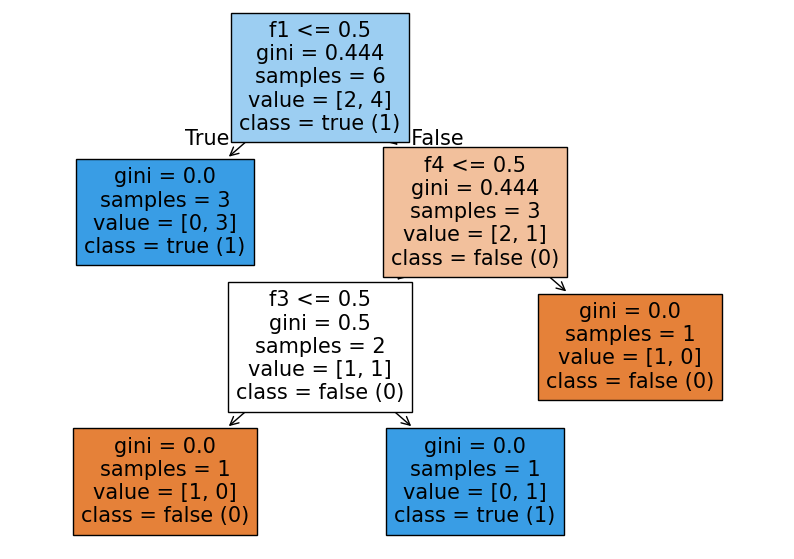

In [7]:
fig = plt.figure(figsize=(10,7))
_ = tree.plot_tree(clf, feature_names=("f1","f2" , "f3", "f4"), class_names=("false (0)", "true (1)"), filled=True)


Where:
- `figsize` restrains the size of the plot,
- `feature_names` gives the names of the different features,
- `class_names` corresponds to human readable labels for each class,
- `filled` is a boolean indicating a preference to show a colorful tree. 


**Tasks:**
- Construct manually a new binary dataset (larger than the one above), associate some labels then study the tree built by default (similar to above). Give some fancy names to the binary features and classes for a visual interpretation. 



## PART 3: The compass dataset

We study here the COMPASS dataset as a case study. Recall that it has been used in a legislative context for predicting recidivism in the U.S. That is, the tendency of a convicted criminal to re-offend


Have a look at the original non-binary dataset ([https://www.kaggle.com/danofer/compass](https://www.kaggle.com/danofer/compass)) to understand the different features. Consider in particular the data used for fairness: propublicaCompassRecividism_data_fairml.csv


**Understanding the dataset:**

Take a moment to think about the following questions 

- What are the features? 
- How many examples in the dataset?
- What are your expectations regarding the most important features? 
- Propose (informally) a way to reduce the dataset
- There many ways to binarize the dataset. How do you propose to do so?



Below, we use a binarized version of the dataset that is used in the FairCORELS library (https://github.com/ferryjul/fairCORELS) as well some of its tools. 

You need first to download the dataset and the tools file and put them in your work directory:

- The dataset compass.csv
- The set of tools utils.py

Load the binary dataset `compass.csv` as follows 

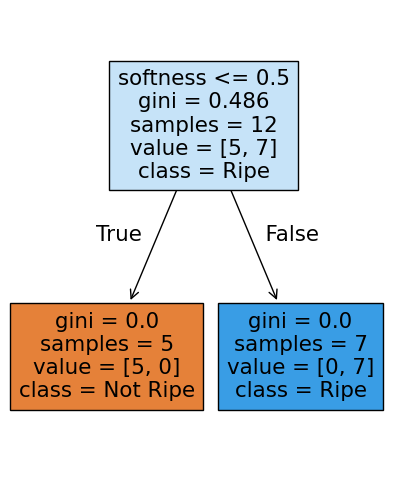

In [8]:

#Construct manually a new binary dataset (larger than the one above), associate some labels then study the tree built by default 
#(similar to above). Give some fancy names to the binary features and classes for a visual interpretation.
# Feature names
X = [
    [0, 0, 1, 0, 0],
    [1, 1, 0, 1, 0],
    [1, 1, 1, 1, 1],
    [0, 1, 1, 1, 1],
    [0, 0, 0, 0, 1],
    [1, 0, 1, 0, 0],
    [1, 1, 1, 0, 1],
    [0, 1, 0, 1, 0],
    [1, 0, 0, 1, 1],
    [0, 0, 1, 1, 1],
    [1, 1, 0, 0, 0],
    [0, 1, 1, 0, 1],
]

# Labels (1: ripe, 0: not ripe)
Y = [0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1]


# Training the classifier
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)

# Plot the tree
fig = plt.figure(figsize=(5,6))
_ = tree.plot_tree(
    clf,
    feature_names=["color_red", "softness", "size_small", "smells_sweet", "days_since_harvest_gt5"],
    class_names=["Not Ripe", "Ripe"],
    filled=True
)
plt.show()



**What are the features?**
- Features Overview (binarized):
    - Race: race_African-American / race_Caucasian
    - Gender:gender_Female / gender_Mal
    - Age groups: age_18-20 / age_21-22 /age_23-25 /age_26-45 /age_>45
    - Juvenile record: juvenile-felonies_>0 /juvenile-misdemeanors_>0 /juvenile-crimes_>0
    - Priors: priors_1 / priors_2-3 /priors_>3
    - Charge: charge_degree_Felony / degree_Misdemeanor
    - two__years_receid
    - finaly: Inverse/negation columns: not_gender_Female /not_gender_Male etc.
      
**how many examples in the dataset :** 5273

**What are your expectations regarding the most important features? :**

**Propose (informally) a way to reduce the dataset**
- Remove Redundant Columns and Merge or Simplify Age Groups young <26 adults <45 and old
- Possibly sensitive attributes (for fairness studies) like race


**There many ways to binarize the dataset. How do you propose to do so?**
- Focus on the most predictive features such as prior convictions , juvenile history (juvenile-felonies_>0), and the severity of the current charge (charge_degree_Felony), which are key indicators of recidivism. Additionally, drop columns with low variance or that provide little added value, to avoid overfitting and simplify the model. This reduction keeps the dataset both interpretable and efficient, while allowing optional inclusion of sensitive attributes like race and gender for fairness analysis if needed.



In [9]:
import csv
import numpy as np
from utils import load_from_csv

train_examples, train_labels, features, prediction = load_from_csv("./compass.csv")

Inspect each of these 4 objects. What do they represent? How many features? examples? 

Have a look at the different parameters of the `DecisionTreeClassifier` class constructor. We will be studying three parameters: 

- splitter
- max_depth 
- min_samples_leaf 

What do they represent? 


**Tasks:**

- 1:  Build severals decision trees (different parameters) and visualize them
- 2: Run a solid evaluation on different trees (with different parameters) by randomly splitting the data 80% for training and 20% for test *multiple times*.
- 3: Do again the evaluation using 5-cross-validation
- 4: Evaluate the impact (in terms of accuracy) of the three parameters : maximum depth, splitting criterion, and the minimum sample leafs. 
- 5: Study the confusion matrix to evaluate the True/False Positive/Negative Rate. What are the most important parameters? 
- 6: Propose a way to assess whether the algorithm is fair to a particular ethnic group.

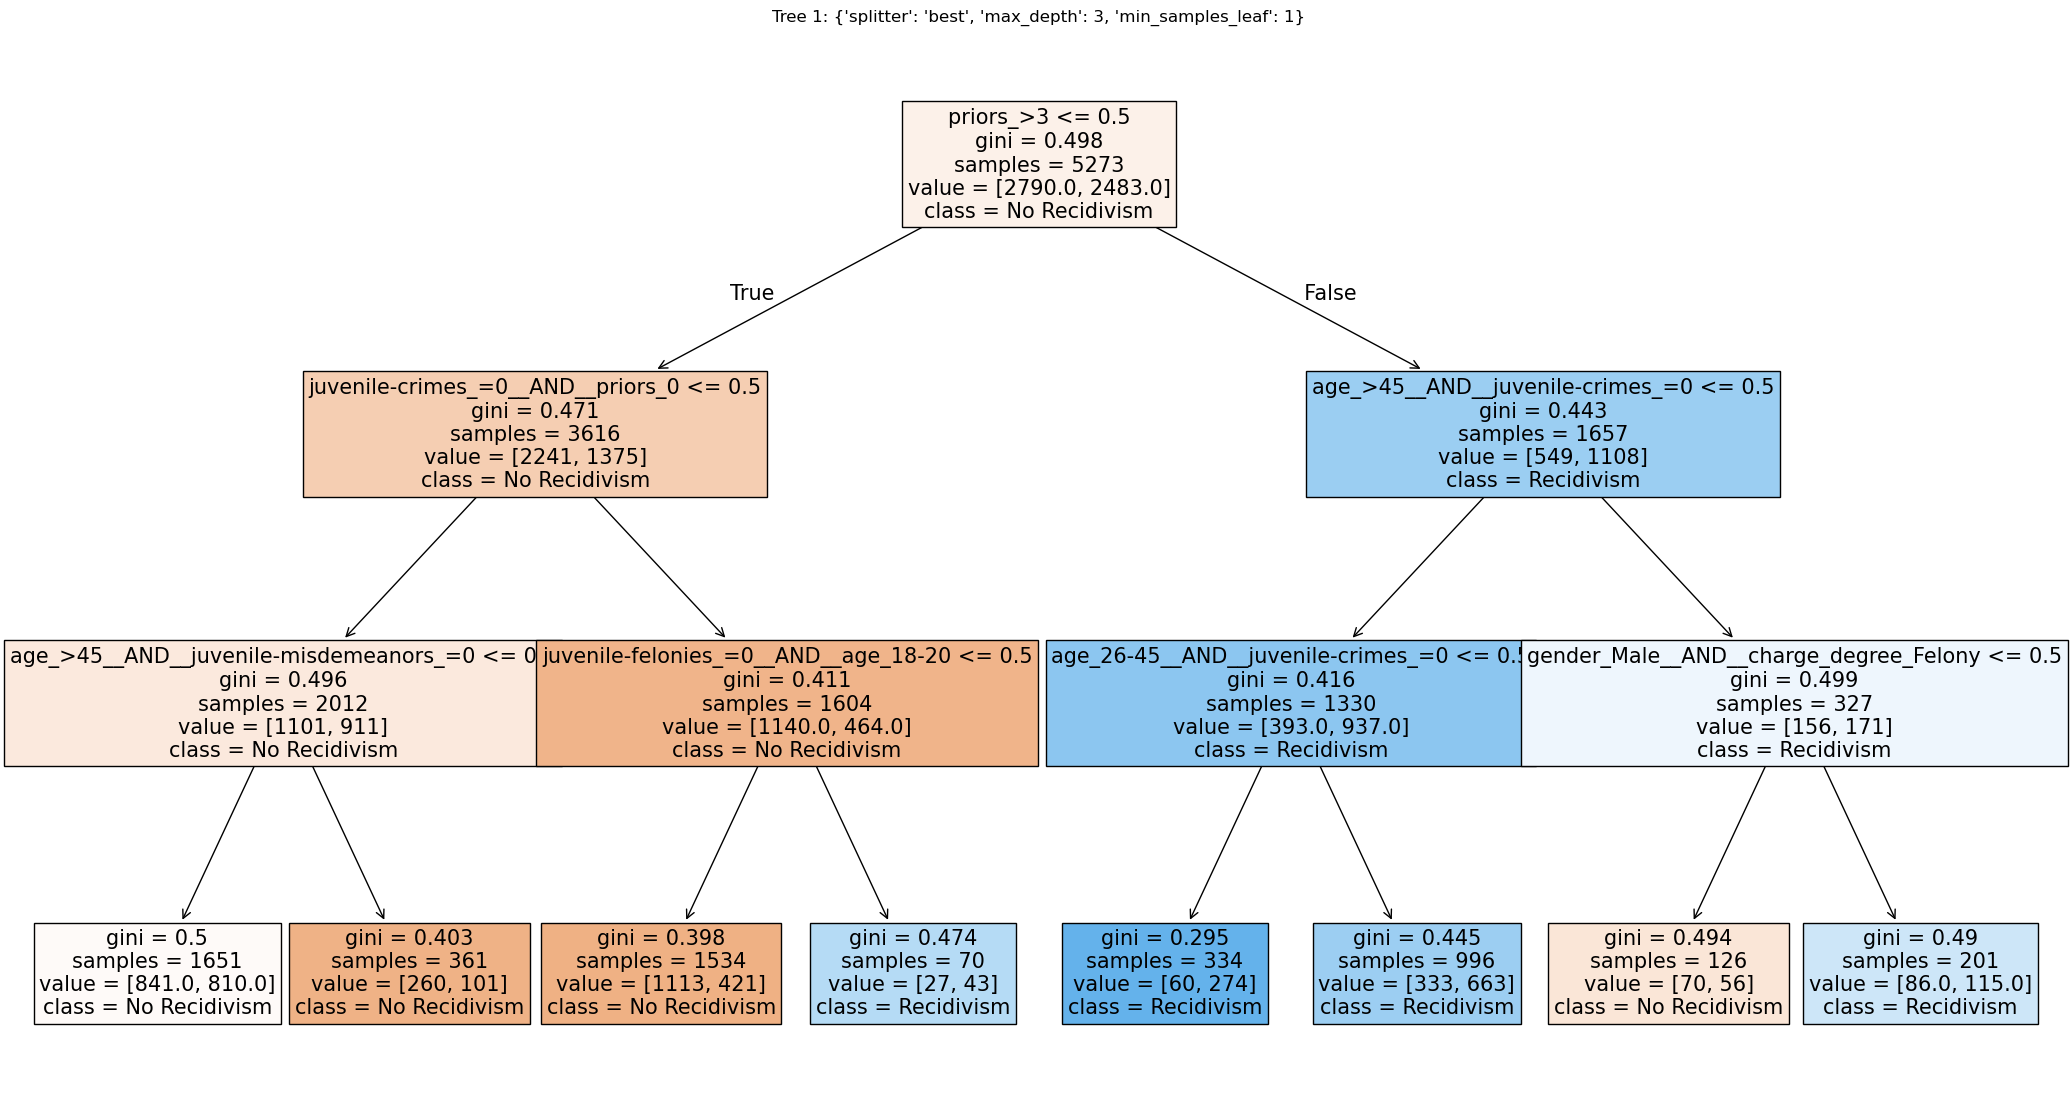

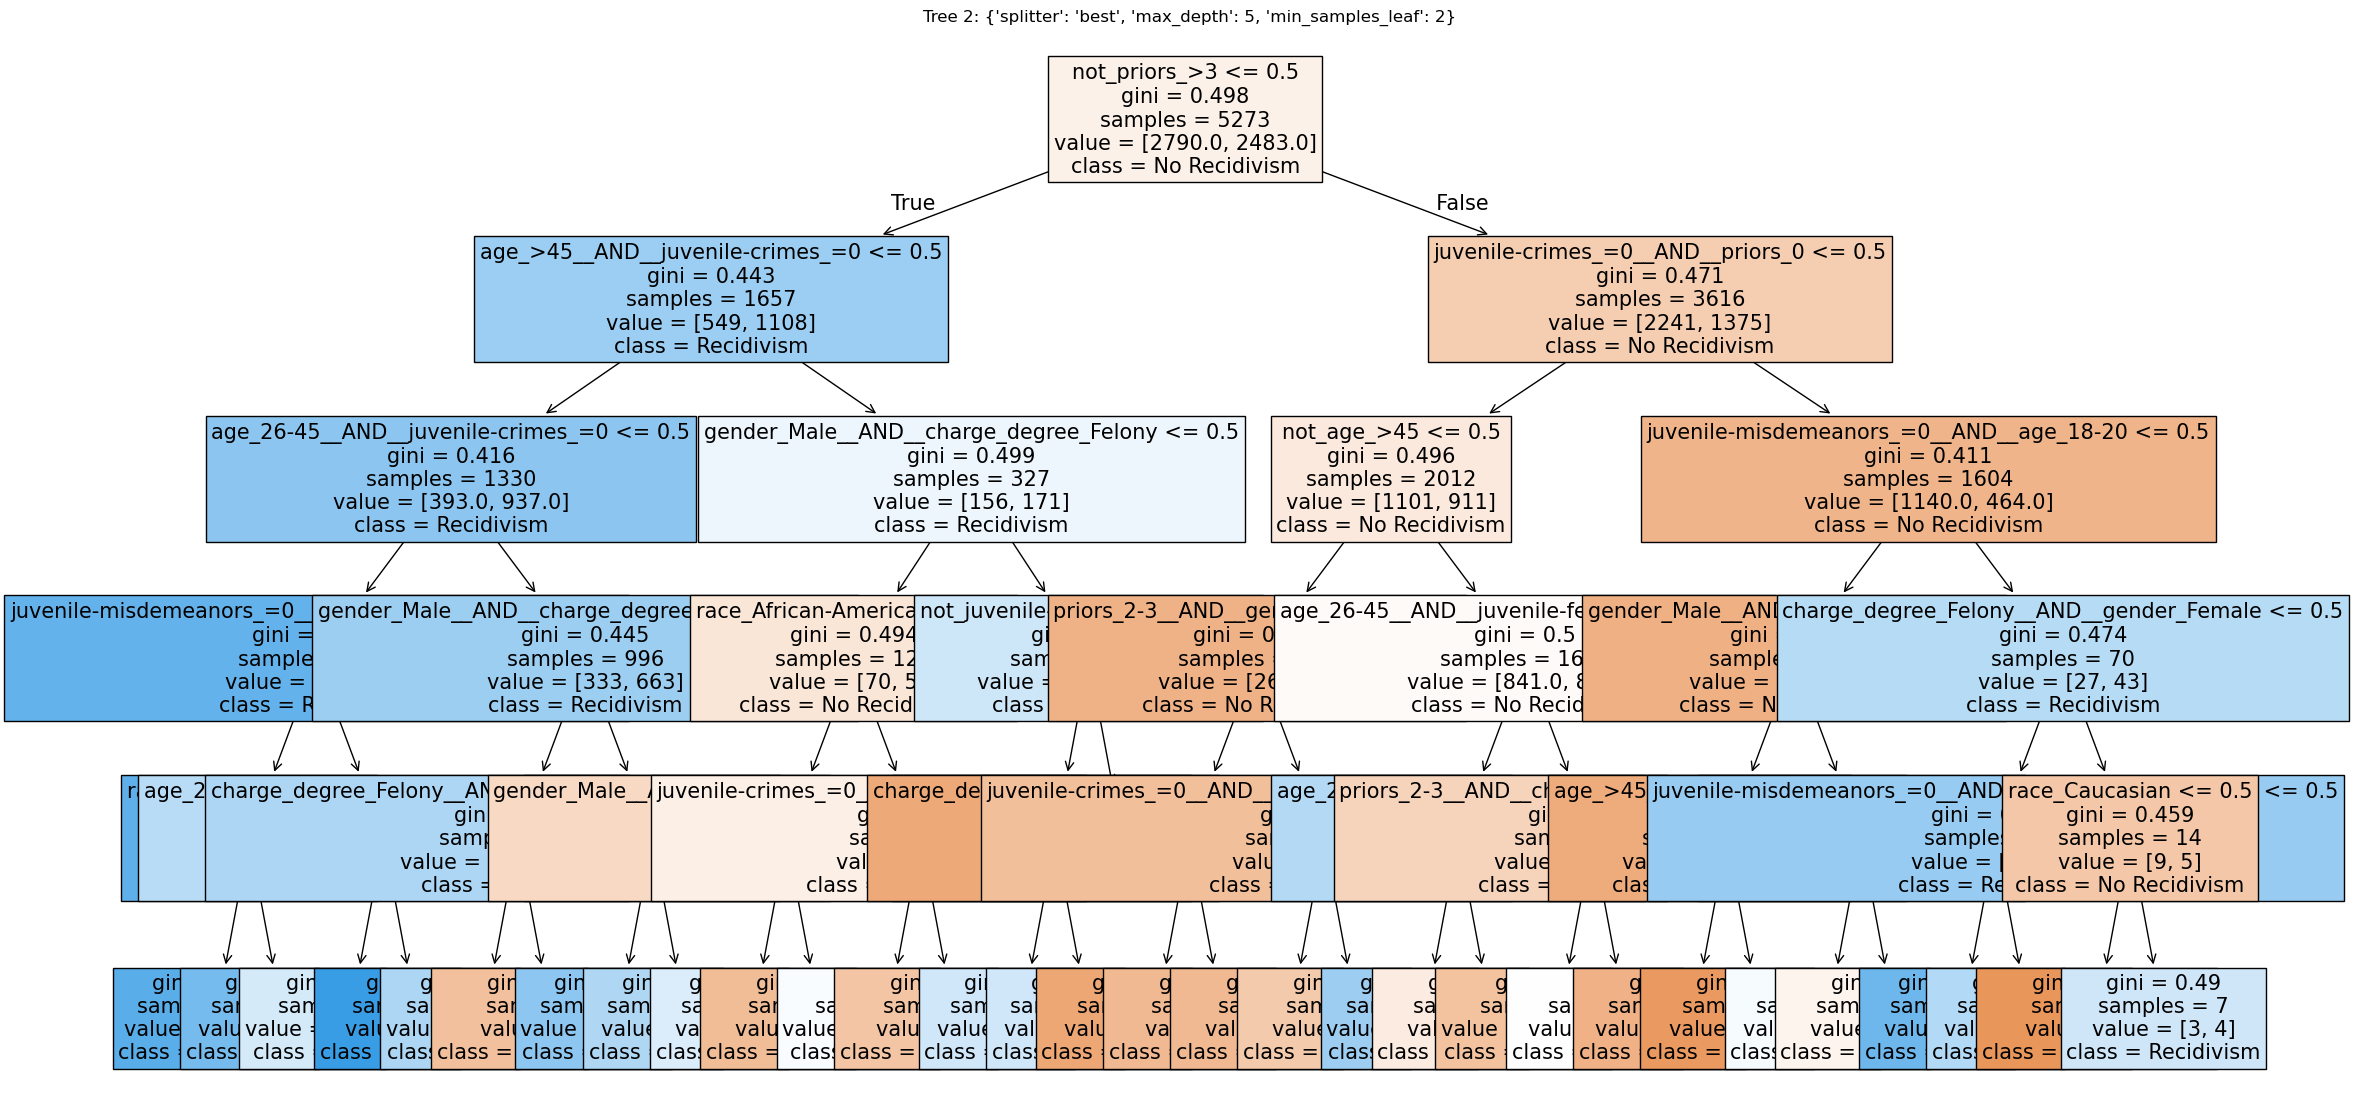

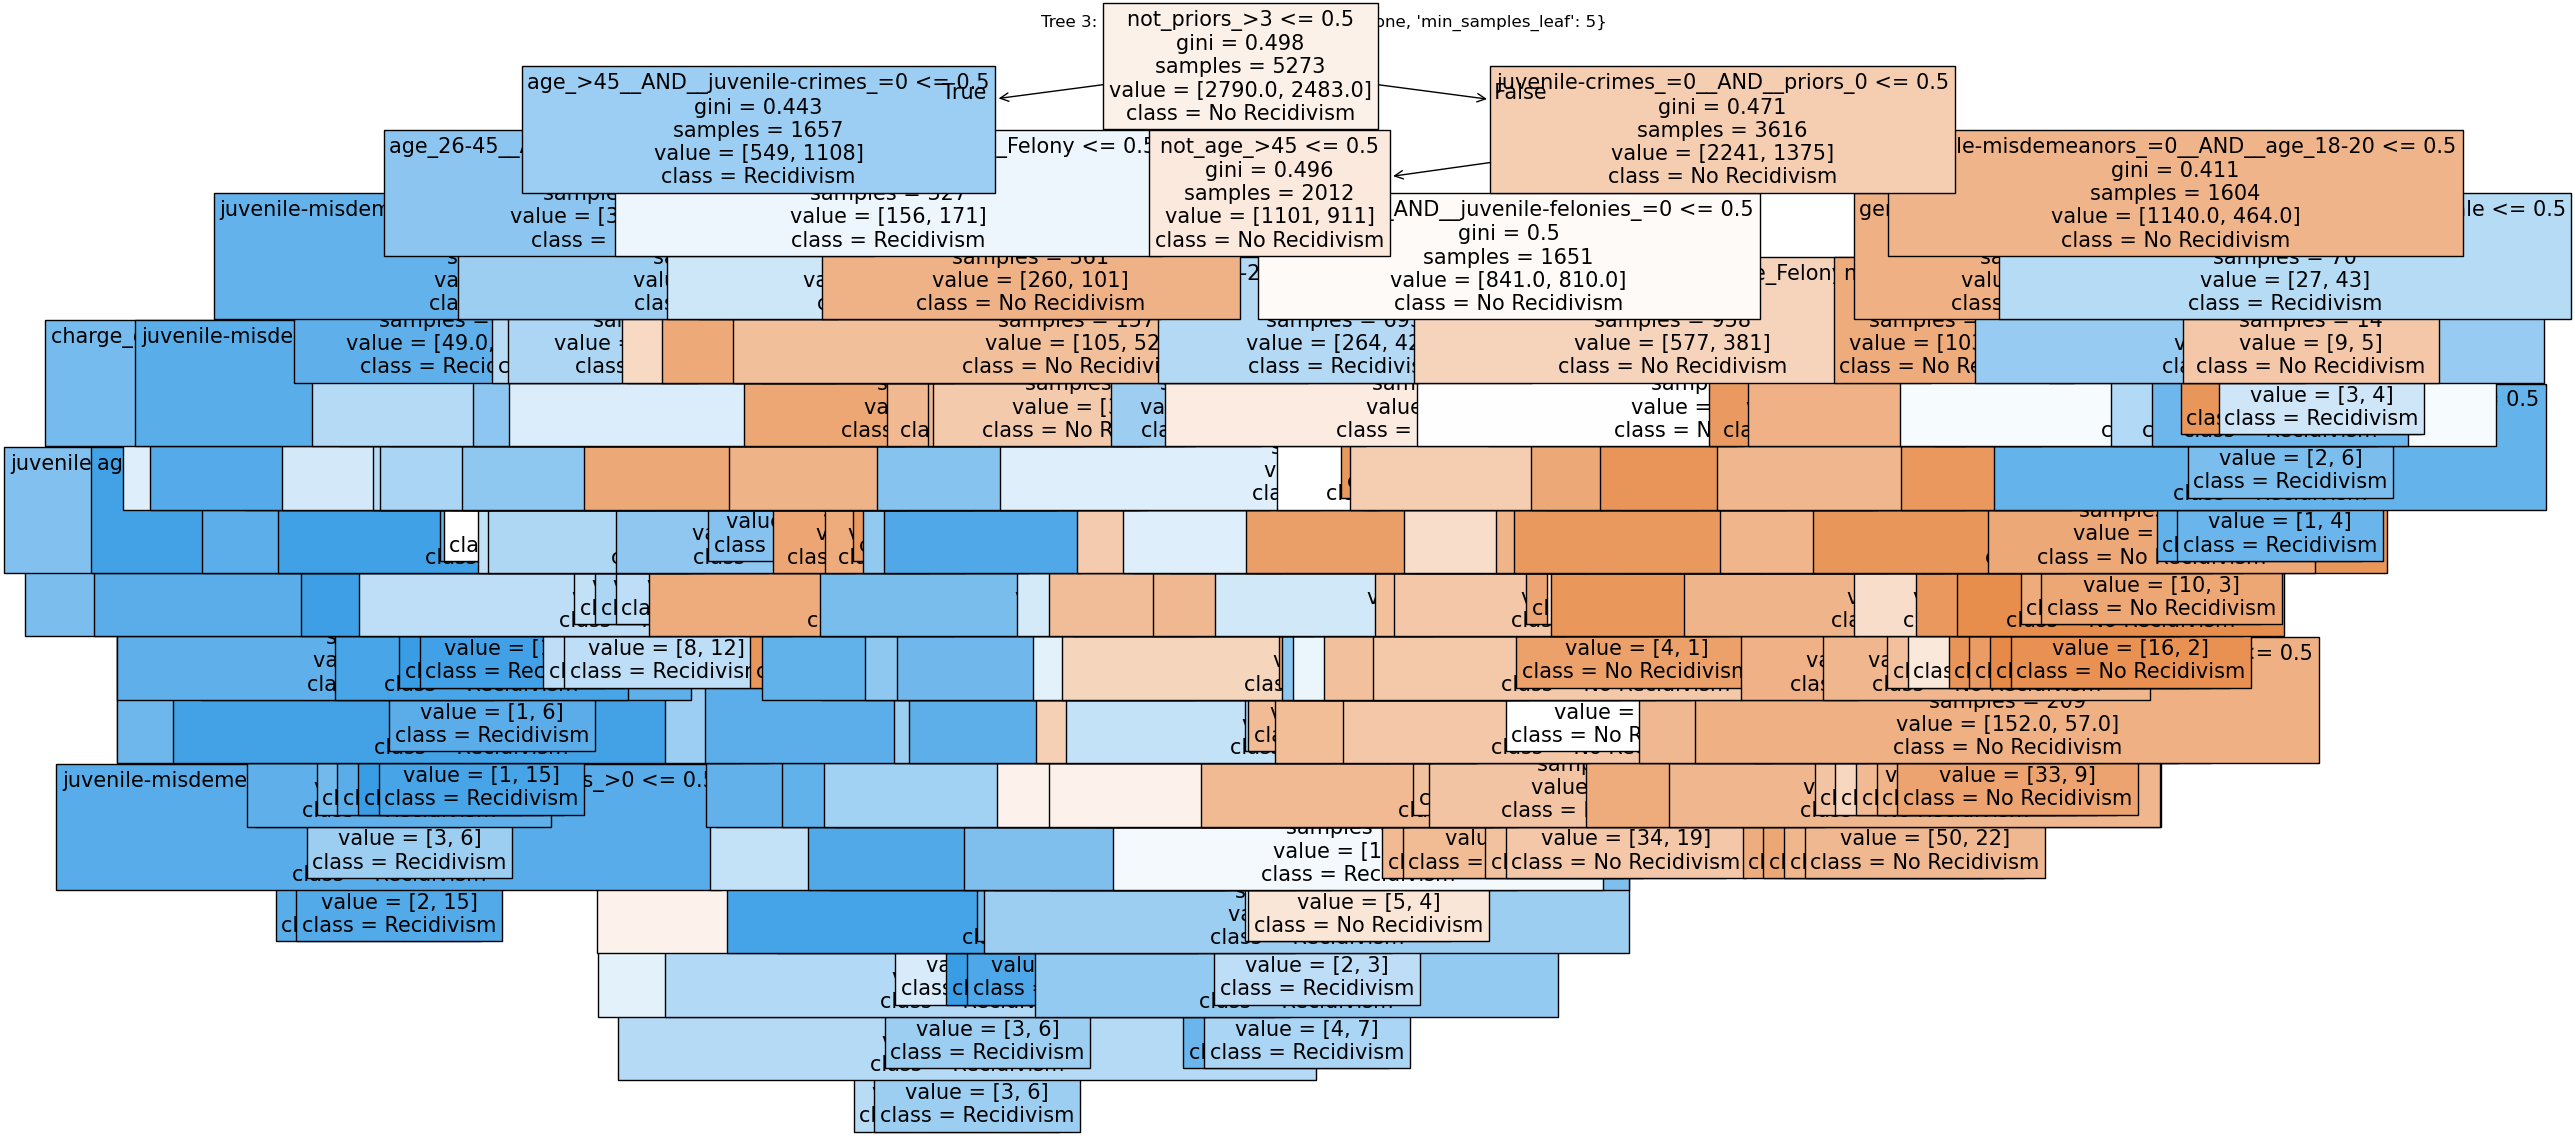

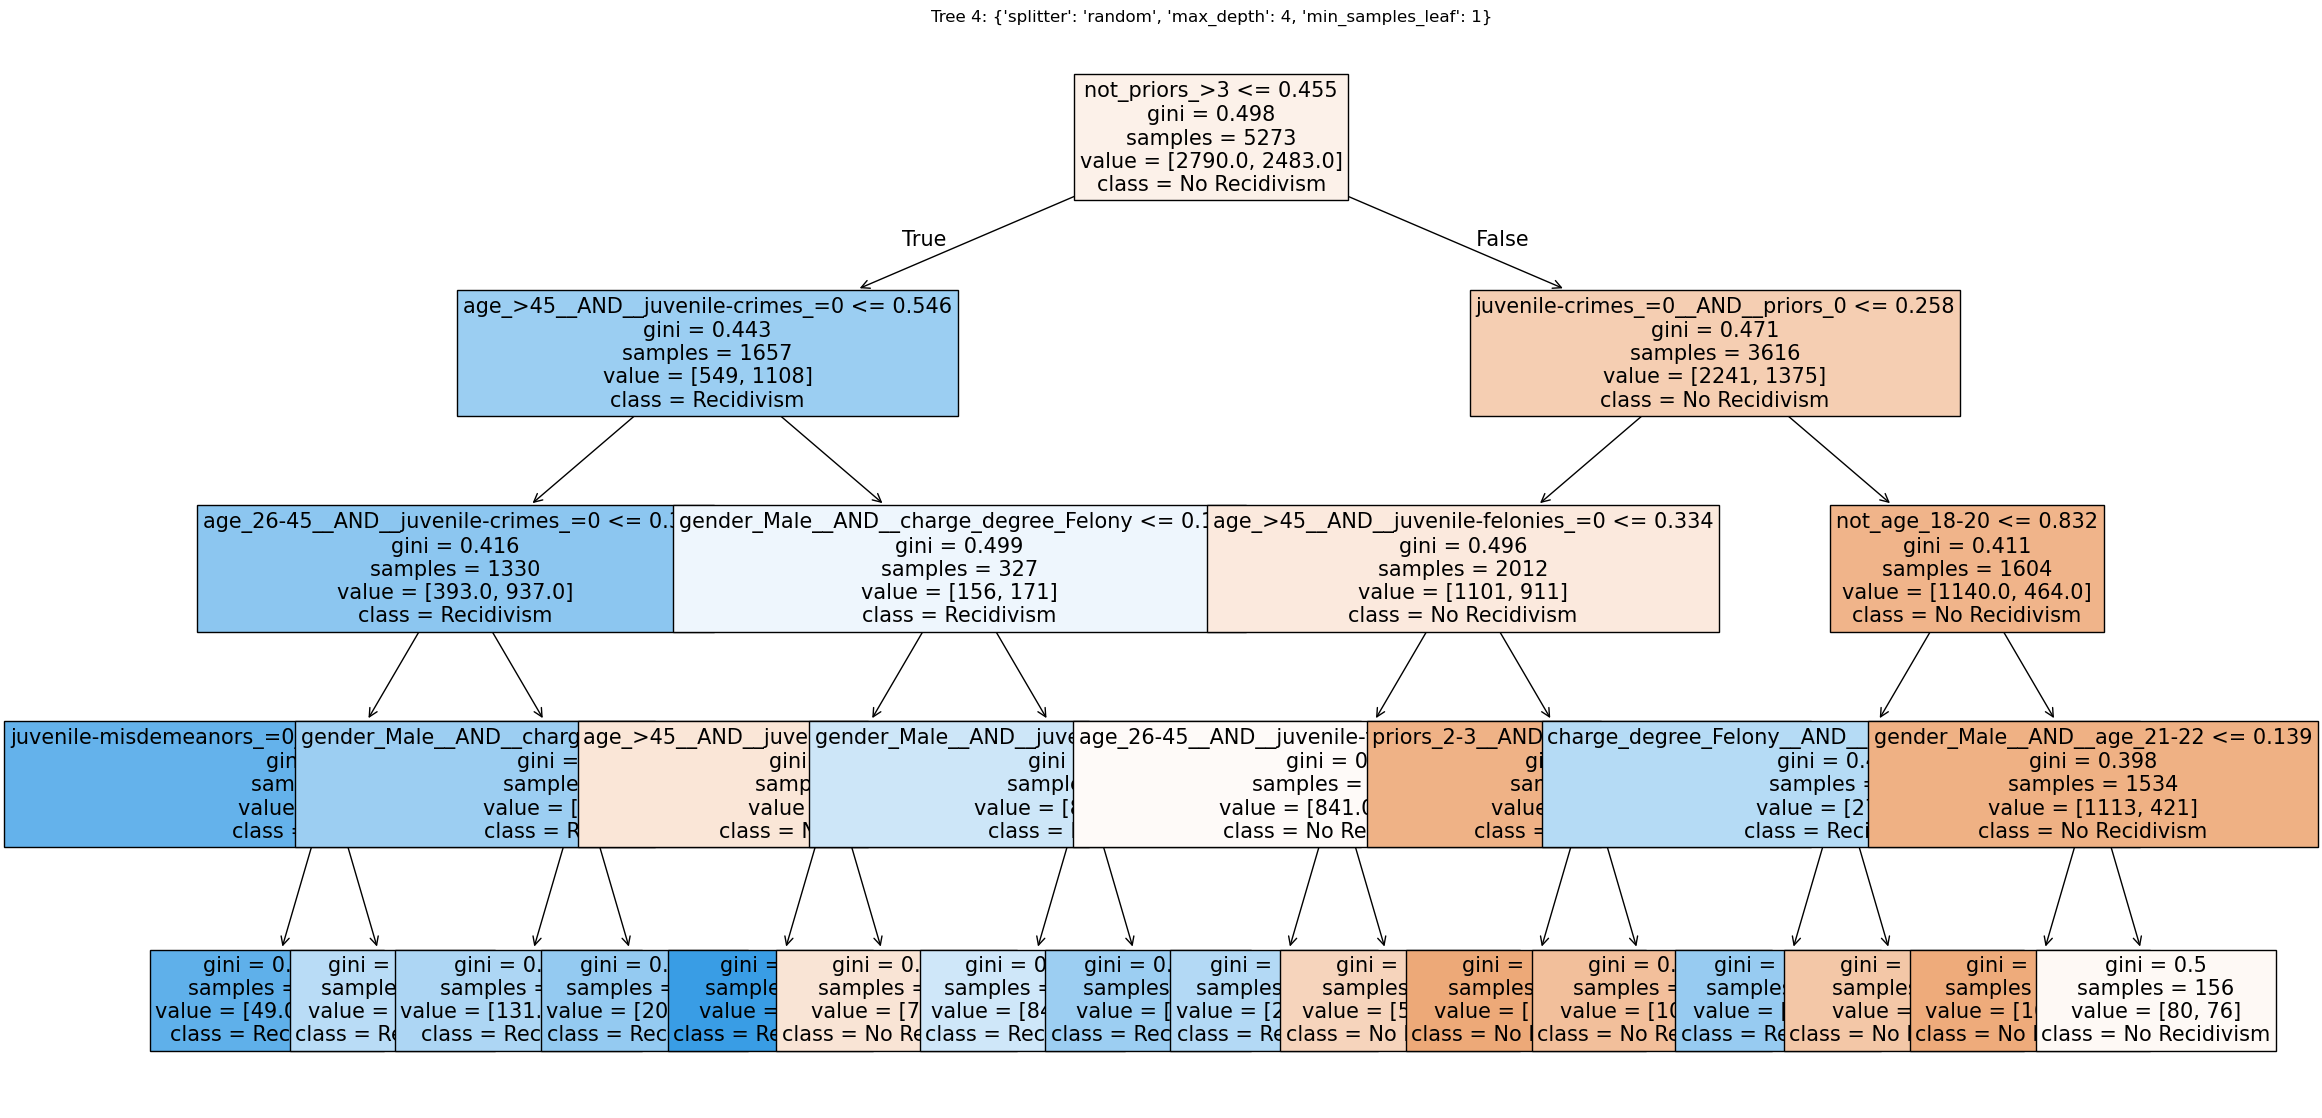

In [10]:
#Task 1: Build several decision trees and visualize them

configs = [
    {'splitter': 'best', 'max_depth': 3, 'min_samples_leaf': 1},
    {'splitter': 'best', 'max_depth': 5, 'min_samples_leaf': 2},
    {'splitter': 'best', 'max_depth': None, 'min_samples_leaf': 5},
    {'splitter': 'random', 'max_depth': 4, 'min_samples_leaf': 1},
]

# Loop through configs and plot each tree
for i, config in enumerate(configs):
    clf = tree.DecisionTreeClassifier(
        splitter=config['splitter'],
        max_depth=config['max_depth'],
        min_samples_leaf=config['min_samples_leaf']
    )
    clf = clf.fit(train_examples, train_labels)
    
    plt.figure(figsize=(26, 14))
    tree.plot_tree(
        clf,
        feature_names=features,
        class_names=["No Recidivism", "Recidivism"],
        filled=True,
        fontsize=15
    )
    plt.title(f"Tree {i+1}: {config}")
    plt.show()


In [11]:
#Solid evaluation with multiple random splits
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

configs = [
    {'splitter': 'best', 'max_depth': 3, 'min_samples_leaf': 1},
    {'splitter': 'best', 'max_depth': 5, 'min_samples_leaf': 2},
    {'splitter': 'random', 'max_depth': 4, 'min_samples_leaf': 1},
]

n_runs = 10

for config in configs:
    scores = []
    for _ in range(n_runs):
        X_train, X_test, y_train, y_test = train_test_split(
            train_examples, train_labels, test_size=0.2, random_state=None
        )
        clf = tree.DecisionTreeClassifier(
            splitter=config['splitter'],
            max_depth=config['max_depth'],
            min_samples_leaf=config['min_samples_leaf']
        )
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        scores.append(acc)
    print(f"Config {config} ➔ Accuracy: {np.mean(scores):.3f} ± {np.std(scores):.3f}")


Config {'splitter': 'best', 'max_depth': 3, 'min_samples_leaf': 1} ➔ Accuracy: 0.634 ± 0.012
Config {'splitter': 'best', 'max_depth': 5, 'min_samples_leaf': 2} ➔ Accuracy: 0.664 ± 0.011
Config {'splitter': 'random', 'max_depth': 4, 'min_samples_leaf': 1} ➔ Accuracy: 0.657 ± 0.021


In [12]:
# Task 3: 5-Fold Cross-Validation (showing raw fold scores)

from sklearn.model_selection import cross_val_score

configs = [
    {'splitter': 'best', 'max_depth': 3, 'min_samples_leaf': 1},
    {'splitter': 'best', 'max_depth': 5, 'min_samples_leaf': 2},
    {'splitter': 'random', 'max_depth': 4, 'min_samples_leaf': 1},
]

for config in configs:
    clf = tree.DecisionTreeClassifier(
        splitter=config['splitter'],
        max_depth=config['max_depth'],
        min_samples_leaf=config['min_samples_leaf']
    )
    scores = cross_val_score(clf, train_examples, train_labels, cv=5)
    print(f"Config {config} ➔ Fold scores: {np.mean(scores):.3f}")


Config {'splitter': 'best', 'max_depth': 3, 'min_samples_leaf': 1} ➔ Fold scores: 0.637
Config {'splitter': 'best', 'max_depth': 5, 'min_samples_leaf': 2} ➔ Fold scores: 0.660
Config {'splitter': 'random', 'max_depth': 4, 'min_samples_leaf': 1} ➔ Fold scores: 0.662


In [13]:
from sklearn.model_selection import cross_val_score
import pandas as pd

# Define ranges
depths = [2, 4, 6, 8, 10]
splitters = ['best', 'random']
min_samples = [1, 2, 5, 10]

# we Collect results
results = []

for d in depths:
    for s in splitters:
        for m in min_samples:
            clf = tree.DecisionTreeClassifier(
                max_depth=d,
                splitter=s,
                min_samples_leaf=m
            )
            scores = cross_val_score(clf, train_examples, train_labels, cv=5)
            avg_acc = round(scores.mean(), 3)  # 3 decimals
            results.append({
                'max_depth': d,
                'splitter': s,
                'min_samples_leaf': m,
                'accuracy': avg_acc
            })

# Create DataFrame and sort
df_results = pd.DataFrame(results)
df_results = df_results.sort_values(by='accuracy', ascending=False).reset_index(drop=True)

# Display the sorted table
print(df_results)


    max_depth splitter  min_samples_leaf  accuracy
0           4   random                10     0.663
1           4     best                10     0.663
2           4     best                 1     0.662
3           4     best                 5     0.662
4           4   random                 1     0.662
5           4   random                 5     0.662
6           4   random                 2     0.661
7           4     best                 2     0.661
8           8   random                10     0.661
9           8     best                10     0.661
10         10     best                10     0.659
11         10   random                10     0.659
12          8   random                 5     0.658
13          6     best                10     0.657
14          6   random                 5     0.657
15          6     best                 5     0.657
16         10     best                 5     0.657
17         10   random                 5     0.657
18          8     best         

After testing different combinations of parameters, the **best configurations** (sorted by accuracy) are:

| max_depth | splitter | min_samples_leaf | accuracy |
|-----------|----------|------------------|----------|
| 4         | random   | 10               | 0.663    |
| 4         | best     | 10               | 0.663    |

In [22]:
# Study the confusion matrix to evaluate the True/False Positive/Negative Rate. What are the most important parameters? 
